

# Logistic Regression Project 


## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as std
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as knn

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# Use info and describe() on ad_data

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

#### Create a histogram of the Age

C:\Users\user\AppData\Local\Temp\ipykernel_1280\2365086259.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ad_data['Age'], bins = 30, kde = False, color = "steelblue", hist_kws = { "alpha" : 1 })


<Axes: xlabel='Age'>

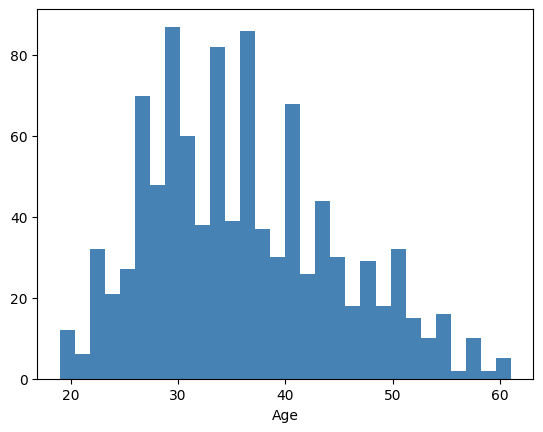

In [19]:
sns.distplot(ad_data['Age'], bins = 30, kde = False, color = "steelblue", hist_kws = { "alpha" : 1 })

**Create a jointplot showing Area Income versus Age.**

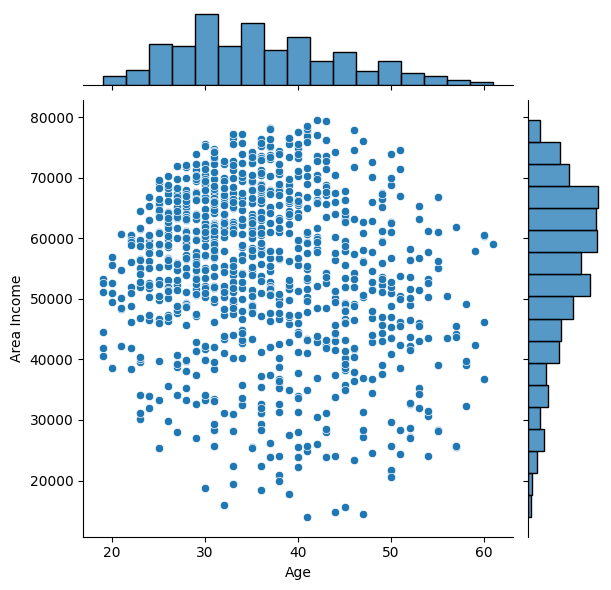

In [51]:
sns.jointplot(x = 'Age', y = 'Area Income', data = ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

In [53]:
%matplotlib inline
sns.set_style('whitegrid')

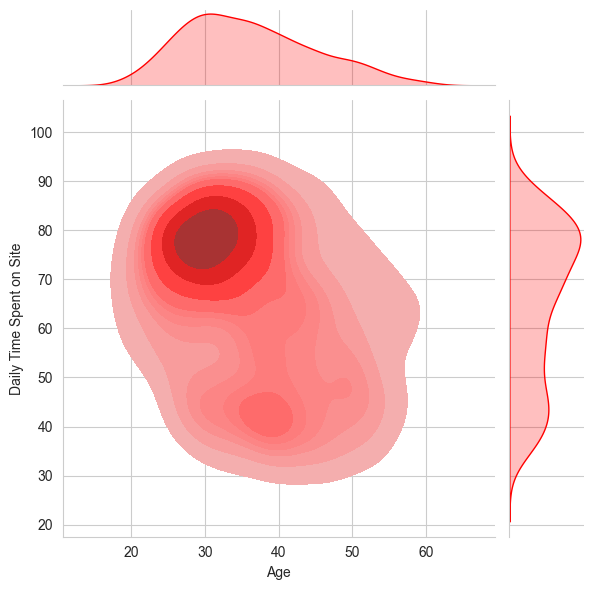

In [71]:
sns.jointplot(x = 'Age', y = 'Daily Time Spent on Site', data = ad_data, kind = 'kde', label = "pearson r = {r:.2f}; p = {p:.1e}",color = 'red',fill=True)

#### Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'

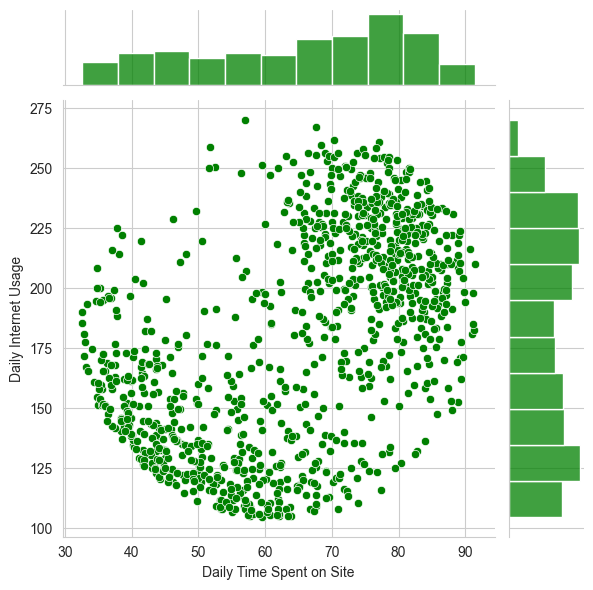

In [58]:
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', data = ad_data, color = 'green')

##### Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.

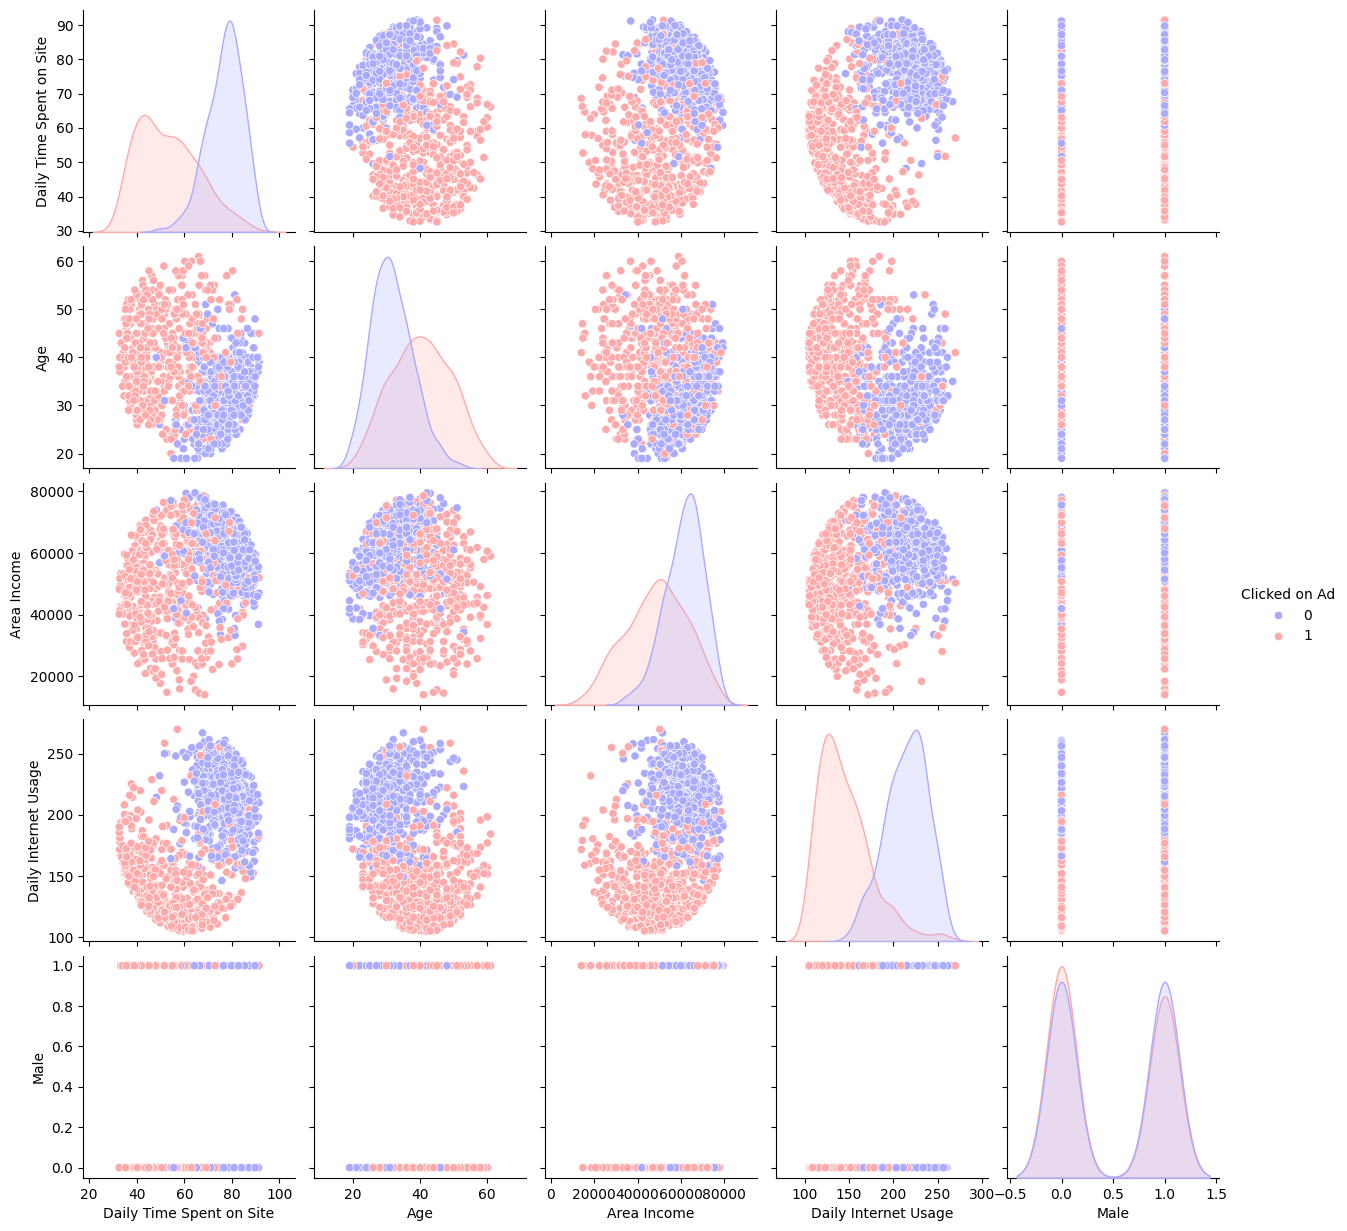

In [21]:
sns.pairplot(ad_data,hue = 'Clicked on Ad', palette = 'bwr')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

##### Split the data into training set and testing set using train_test_split

In [23]:
feature = ad_data.drop(['Ad Topic Line','City','Country'],axis=1)

In [25]:
feature.drop('Clicked on Ad',axis=1,inplace=True)

In [35]:
feature.drop('Timestamp',axis=1,inplace=True)

In [27]:
target = ad_data['Clicked on Ad']

In [36]:
x_train,x_test,y_train,y_test = std(feature,target,test_size = 0.25)

##### Train and fit a logistic regression model on the training set.

In [72]:
m = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=None, solver='liblinear', tol=0.0001,verbose=0, warm_start=False)

In [80]:
m.fit(x_train,y_train)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [89]:
print(m.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


## Predictions and Evaluations
##### Now predict values for the testing data.

In [75]:
y_pred = m.predict(x_test)

** Create a classification report for the model.**

In [76]:
print(confusion_matrix(y_test, y_pred))

[[124   8]
 [ 15 103]]


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       132
           1       0.93      0.87      0.90       118

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



## Great Job!

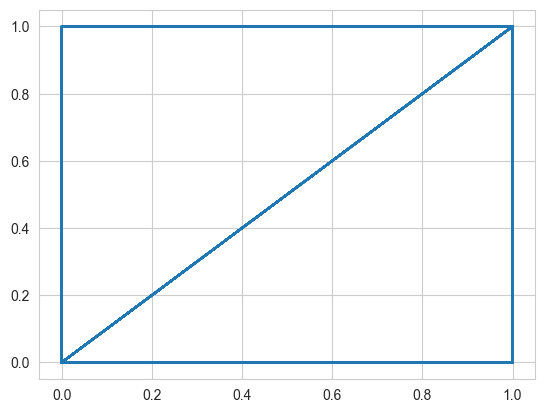

In [90]:
plt.plot(y_test,y_pred)

In [91]:
from sklearn.metrics import accuracy_score

In [93]:
accuracy_score(y_test,y_pred) * 100

90.8